In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.modeling import models, fitting
from astropy.modeling.models import Sersic1D


In [2]:
arcsec87, SB87, SB_err87 = np.loadtxt("\\Users\\casey\\Downloads\\class_lab\\class_lab\\class_and_homework\\ds9_M87_radial_profile",
usecols=[0,1,2],unpack=True)
# here I read arcsec, surface brightness and the error on the surface brightness

arcsec101, SB101, SB_err101 = np.loadtxt("\\Users\\casey\\Downloads\\class_lab\\class_lab\\class_and_homework\\ds9_M101_radial_profile",
usecols=[0,1,2],unpack=True)


arcsec81bulge, SB81bulge, SB_err81bulge = np.loadtxt("\\Users\\casey\\Downloads\\class_lab\\class_lab\\class_and_homework\\ds9_M81_bulge_radial_profile",
usecols=[0,1,2],unpack=True)


arcsec81disk, SB81disk, SB_err81disk = np.loadtxt("\\Users\\casey\\Downloads\\class_lab\\class_lab\\class_and_homework\\ds9_M81_disk_radial_profile",
usecols=[0,1,2],unpack=True)



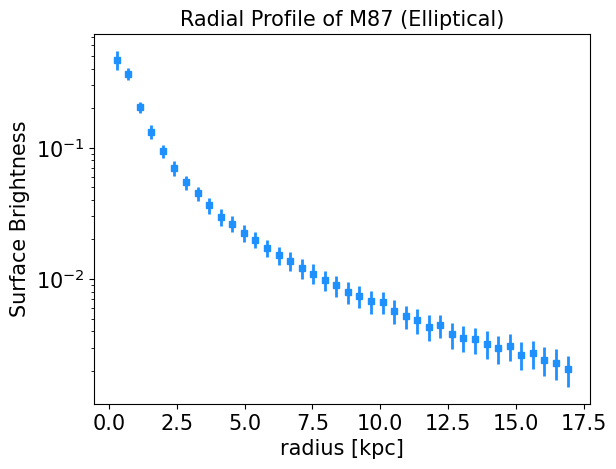

In [3]:
distance87 = 16.4 # [Mpc] 10 here is just an example. You have values in distances.pdf (check on NED if you are curious)
radius87 = distance87 * arcsec87 / 206
# here I transform angular scales in phsysical scales: arcsec --> kpc


fig = plt.figure()
plt.errorbar(radius87, SB87, yerr=SB_err87, lw=2, markersize=5, fmt='s', color='dodgerblue')
plt.xlabel(r'radius [kpc]', fontsize=15)
plt.ylabel(r'Surface Brightness', fontsize=15)
plt.xticks(size=15)
plt.yticks(size=15)
plt.semilogy() # log scale for the y-a
plt.title('Radial Profile of M87 (Elliptical)', fontsize=15)
plt.show()

Astropy
Model: Sersic1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
         amplitude             r_eff               n        
    -------------------- ----------------- -----------------
    0.011058548468025727 7.587441750798516 3.439868777847558
error = [0.00240811 0.85787383 0.37941426]


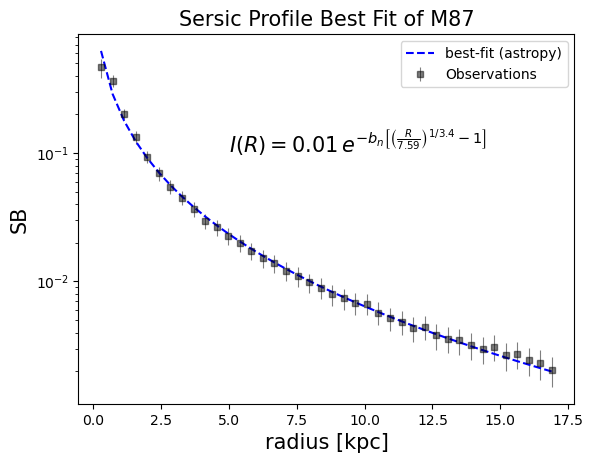

In [4]:
Sersic_init = Sersic1D(amplitude=0.5, r_eff=1, n=4.0)

fit = fitting.LevMarLSQFitter()

best_Sersic = fit(Sersic_init, radius87, SB87, weights = 1/SB_err87, maxiter=5000)

print('Astropy')
print(best_Sersic)

cov_diag = np.sqrt(np.diag(fit.fit_info['param_cov']))
print('error =', cov_diag)

plt.errorbar(radius87, SB87, yerr=SB_err87, lw=0.8, markersize=5, fmt='s', color='k', alpha=0.5, label='Observations')

plt.plot(radius87, best_Sersic(radius87), 'b--', label='best-fit (astropy)')

plt.legend()

plt.xlabel('radius [kpc]', fontsize=15)
plt.ylabel('SB', fontsize=15)
plt.xticks(size=10)
plt.yticks(size=10)
plt.semilogy()

plt.text(5, .1, fr"$I(R) = {0.011058548468025727:.2f} \, e^{{-b_n \left[\left(\frac{{R}}{{{7.587441750798516:.2f}}}\right)^{{1/{3.439868777847558:.1f}}} - 1\right]}}$", fontsize=15)
plt.title('Sersic Profile Best Fit of M87', fontsize=15)
plt.legend()
plt.show()

[0.22206474 0.1710194  0.13813122 0.11427828 0.09602394 0.08159723
 0.0699425  0.06037362 0.05241814 0.04573697 0.04007898 0.03525359
 0.03111328 0.02754197 0.02444707 0.02175389 0.01940153 0.0173399
 0.01552752 0.01392976 0.01251755 0.01126634 0.0101553  0.00916668
 0.00828529 0.00749806 0.00679372 0.00616254 0.00559604 0.00508686
 0.00462858 0.00421557 0.00384289 0.0035062  0.00320169 0.00292598
 0.00267608 0.00244936 0.00224346 0.00205631]
[0.46604503 0.3653955  0.20281195 0.13269944 0.09375504 0.06962327
 0.05450173 0.04495236 0.0364521  0.0296727  0.02644833 0.02255522
 0.01996606 0.01727801 0.01515969 0.01381125 0.01209786 0.01099374
 0.00982172 0.0089556  0.00793799 0.00738494 0.00681361 0.00668266
 0.00571882 0.00519307 0.00484433 0.0043369  0.0044408  0.0037995
 0.00357238 0.00346951 0.00322117 0.00297405 0.00310536 0.00266074
 0.00273256 0.00243557 0.00231277 0.00204837]


Text(0.5, 1.0, 'Plot of Residuals of M87')

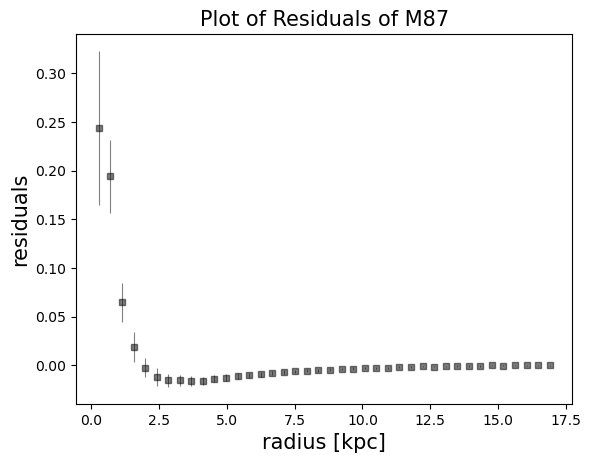

In [18]:
print(best_Sersic(radius87))
print(SB87)
residuals = SB87 - best_Sersic(radius87) 

plt.errorbar(radius87, residuals, yerr=SB_err87, lw=0.8, markersize=5, fmt='s', color='k', alpha=0.5)

plt.xlabel('radius [kpc]', fontsize=15)
plt.ylabel('residuals', fontsize=15)
plt.xticks(size=10)
plt.yticks(size=10)
plt.title('Plot of Residuals of M87', fontsize=15)

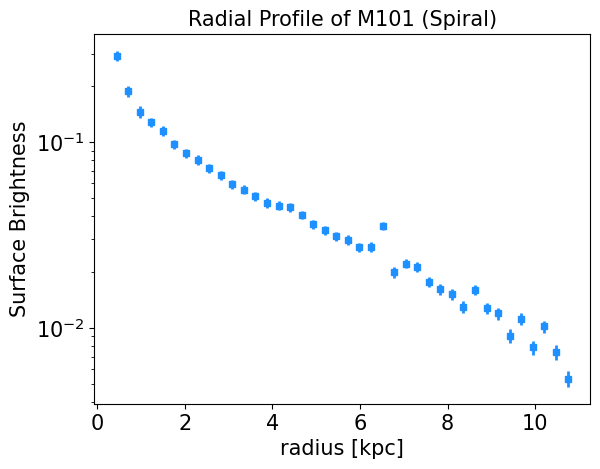

In [6]:
distance101 = 6.4 # [Mpc] 10 here is just an example. You have values in distances.pdf (check on NED if you are curious)
radius101 = distance101 * arcsec101 / 206
# here I transform angular scales in phsysical scales: arcsec --> kpc
fig = plt.figure()
plt.errorbar(radius101, SB101, yerr=SB_err101, lw=2, markersize=5, fmt='s', color='dodgerblue')
plt.xlabel(r'radius [kpc]', fontsize=15)
plt.ylabel(r'Surface Brightness', fontsize=15)
plt.xticks(size=15)
plt.yticks(size=15)
plt.semilogy() # log scale for the y-a
plt.title('Radial Profile of M101 (Spiral)', fontsize=15)
plt.show()

$I(R) = I_{e}*e^{(-b_{n}[(\frac{R}{R_{e}})^{\frac{1}{n}}-1])}$

Astropy
Model: Sersic1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
         amplitude             r_eff               n         
    -------------------- ----------------- ------------------
    0.022876169709205325 6.489834790041108 1.4456738583233242
error = [0.00138462 0.21006849 0.07196854]


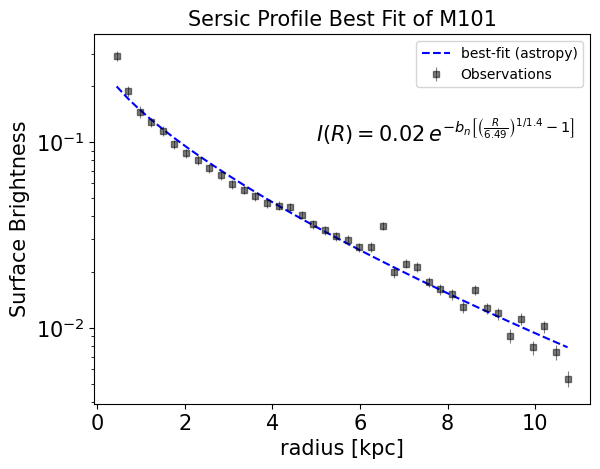

In [7]:
Sersic_init = Sersic1D(amplitude=0.5, r_eff=1, n=1.0)

fit = fitting.LevMarLSQFitter()

best_Sersic = fit(Sersic_init, radius101, SB101, weights = 1/SB_err101, maxiter=5000)

print('Astropy')
print(best_Sersic)

cov_diag = np.sqrt(np.diag(fit.fit_info['param_cov']))
print('error =', cov_diag)

plt.errorbar(radius101, SB101, yerr=SB_err101, lw=0.8, markersize=5, fmt='s', color='k', alpha=0.5, label='Observations')

plt.plot(radius101, best_Sersic(radius101), 'b--', label='best-fit (astropy)')

plt.legend()

plt.xlabel(r'radius [kpc]', fontsize=15)
plt.ylabel(r'Surface Brightness', fontsize=15)
plt.xticks(size=15)
plt.yticks(size=15)
plt.semilogy() # log scale for the y-a
plt.title('Sersic Profile Best Fit of M101', fontsize=15)
plt.text(5, .1, fr"$I(R) = {0.022876169709205325:.2f} \, e^{{-b_n \left[\left(\frac{{R}}{{{6.489834790041108:.2f}}}\right)^{{1/{1.4456738583233242:.1f}}} - 1\right]}}$", fontsize=15)

plt.legend()
plt.show()

[0.19940209 0.17110939 0.14936314 0.13183418 0.1173009  0.10501997
 0.0944972  0.08538406 0.07742405 0.07042232 0.06422712 0.05871783
 0.05379705 0.049385   0.04541557 0.04183345 0.03859194 0.03565131
 0.03297753 0.03054129 0.02831719 0.02628311 0.02441972 0.02271004
 0.0211391  0.01969368 0.01836203 0.01713371 0.0159994  0.01495077
 0.01398034 0.01308141 0.01224791 0.01147441 0.01075596 0.01008812
 0.00946681 0.00888838 0.00834947 0.00784703]
[0.29160229 0.18738337 0.14507402 0.12771335 0.11464996 0.09752083
 0.08696295 0.08022411 0.07227933 0.06609996 0.05947643 0.05552726
 0.0511555  0.04707404 0.04548659 0.04459615 0.04052997 0.03612239
 0.03364186 0.0311996  0.02965446 0.02707109 0.02728716 0.0354203
 0.0198562  0.02217405 0.02120195 0.01767    0.01609846 0.01516233
 0.01297305 0.01599735 0.01274367 0.01196338 0.00905448 0.01114745
 0.00783256 0.01015789 0.00739612 0.0053165 ]


Text(0.5, 1.0, 'Plot of Residuals of M101')

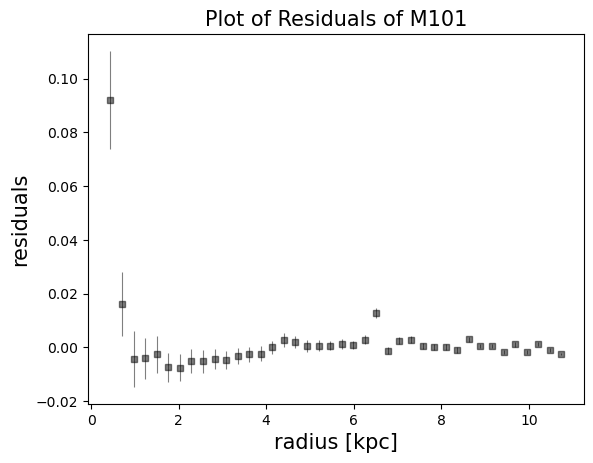

In [21]:
print(best_Sersic(radius101))
print(SB101)
residuals101 = SB101 - best_Sersic(radius101)

plt.errorbar(radius101, residuals101, yerr=SB_err101, lw=0.8, markersize=5, fmt='s', color='k', alpha=0.5)
plt.xlabel('radius [kpc]', fontsize=15)
plt.ylabel('residuals', fontsize=15)
plt.xticks(size=10)
plt.yticks(size=10)
plt.title('Plot of Residuals of M101', fontsize=15)


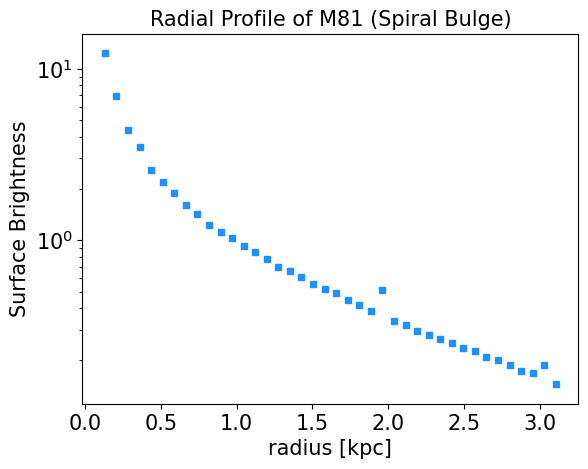

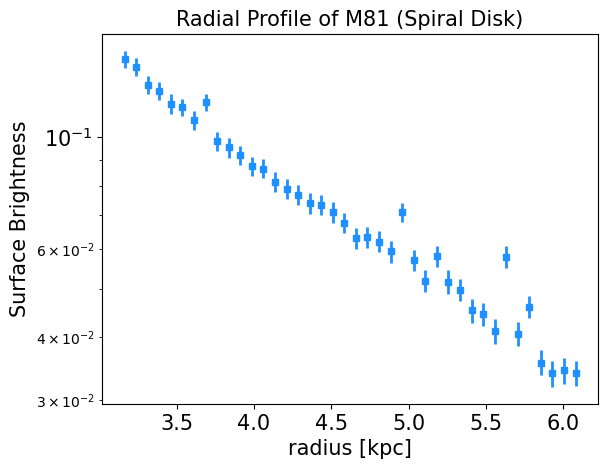

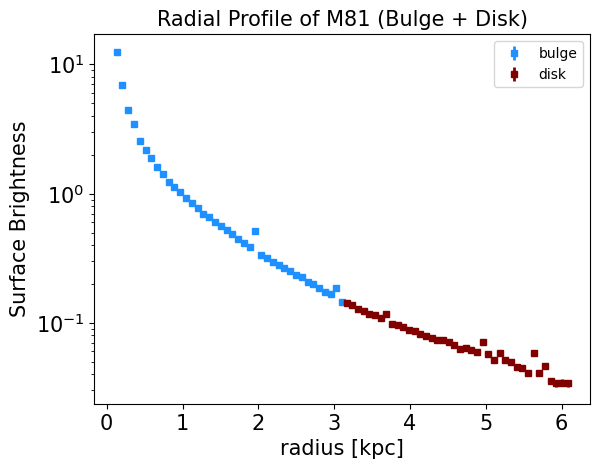

In [9]:
distance81bulge = 3.6 # [Mpc] 10 here is just an example. You have values in distances.pdf (check on NED if you are curious)
radius81bulge = distance81bulge * arcsec81bulge / 206
# here I transform angular scales in phsysical scales: arcsec --> kpc
fig = plt.figure()
plt.errorbar(radius81bulge, SB81bulge, yerr=SB_err81bulge, lw=2, markersize=5, fmt='s', color='dodgerblue')
plt.xlabel(r'radius [kpc]', fontsize=15)
plt.ylabel(r'Surface Brightness', fontsize=15)
plt.xticks(size=15)
plt.yticks(size=15)
plt.semilogy() # log scale for the y-a
plt.title('Radial Profile of M81 (Spiral Bulge)', fontsize=15)
plt.show()

distance81disk = 3.6 # [Mpc] 10 here is just an example. You have values in distances.pdf (check on NED if you are curious)
radius81disk = distance81disk * arcsec81disk / 206
# here I transform angular scales in phsysical scales: arcsec --> kpc
fig = plt.figure()
plt.errorbar(radius81disk, SB81disk, yerr=SB_err81disk, lw=2, markersize=5, fmt='s', color='dodgerblue')
plt.xlabel(r'radius [kpc]', fontsize=15)
plt.ylabel(r'Surface Brightness', fontsize=15)
plt.xticks(size=15)
plt.yticks(size=15)
plt.semilogy() # log scale for the y-a
plt.title('Radial Profile of M81 (Spiral Disk)', fontsize=15)
plt.show()

fig =plt.figure()
plt.errorbar(radius81bulge, SB81bulge, yerr=SB_err81bulge, lw=2, markersize=5, fmt='s', color='dodgerblue', label='bulge')
plt.errorbar(radius81disk, SB81disk, yerr=SB_err81disk, lw=2, markersize=5, fmt='s', color='maroon', label='disk')
plt.xlabel(r'radius [kpc]', fontsize=15)
plt.ylabel(r'Surface Brightness', fontsize=15)
plt.xticks(size=15)
plt.yticks(size=15)
plt.semilogy() # log scale for the y-a
plt.legend()
plt.title('Radial Profile of M81 (Bulge + Disk)', fontsize=15)
plt.show()


Astropy
Model: Sersic1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
         amplitude            r_eff               n        
    ------------------- ----------------- -----------------
    0.02916056164074387 8.211506620473706 6.372548549899446
error = [0.0072599  1.21067321 0.38247144]


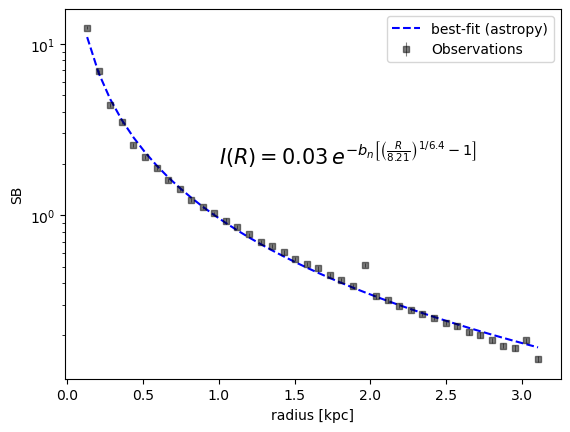

In [10]:
Sersic_initbulge = Sersic1D(amplitude=0.5, r_eff=1, n=4.0)


fit = fitting.LevMarLSQFitter()

best_Sersicbulge = fit(Sersic_initbulge, radius81bulge, SB81bulge, weights = 1/SB_err81bulge, maxiter=5000)


print('Astropy')
print(best_Sersicbulge)


cov_diag = np.sqrt(np.diag(fit.fit_info['param_cov']))
print('error =', cov_diag)

plt.errorbar(radius81bulge, SB81bulge, yerr=SB_err81bulge, lw=0.8, markersize=5, fmt='s', color='k', alpha=0.5, label='Observations')

plt.plot(radius81bulge, best_Sersicbulge(radius81bulge), 'b--', label='best-fit (astropy)')

plt.legend()

plt.xlabel('radius [kpc]')
plt.ylabel('SB')
plt.xticks(size=10)
plt.yticks(size=10)
plt.semilogy()
plt.text(1, 2, fr"$I(R) = {0.02916056164074387:.2f} \, e^{{-b_n \left[\left(\frac{{R}}{{{8.211506620473706:.2f}}}\right)^{{1/{6.372548549899446:.1f}}} - 1\right]}}$", fontsize=15)

plt.legend()
plt.show()

In [11]:
# Sersic_initdisk = Sersic1D(amplitude=0.5, r_eff=1, n=1.0)

# fit = fitting.LevMarLSQFitter()

# best_Sersicdisk = fit(Sersic_initdisk, radius81disk, SB81disk, weights = 1/SB_err81disk, maxiter=5000, filter_non_finite=True)

# print('Astropy')
# print(best_Sersicdisk)

# cov_diag = np.sqrt(np.diag(fit.fit_info['param_cov']))
# print('error =', cov_diag)

# plt.errorbar(radius81disk, SB81disk, yerr=SB_err81disk, lw=0.8, markersize=5, fmt='s', color='k', alpha=0.5, label='Observations')

# plt.plot(radius81disk, best_Sersicdisk(radius81disk), 'b--', label='best-fit (astropy)')

# plt.legend()

# plt.xlabel(r'radius [kpc]', fontsize=15)
# plt.ylabel(r'Surface Brightness', fontsize=15)
# plt.xticks(size=15)
# plt.yticks(size=15)
# plt.semilogy() # log scale for the y-a
# plt.title('Sersic Profile Best Fit of M81', fontsize=15)

# plt.legend()
# plt.show()

In [12]:
# 1) Clean data: finite, positive SB and SB_err>0 (semilogy + weights need this)
mask = (
    np.isfinite(radius81disk) &
    np.isfinite(SB81disk) & (SB81disk > 0) &
    np.isfinite(SB_err81disk) & (SB_err81disk > 0)
)
x = np.asarray(radius81disk)[mask].astype(float)
y = np.asarray(SB81disk)[mask].astype(float)
err = np.asarray(SB_err81disk)[mask].astype(float)

# Clip weights to avoid inf/huge values if err is tiny
eps = np.finfo(float).tiny
w = 1.0 / np.clip(err, eps, np.inf)

# (Optional) rescale x for numerical conditioning (undo in plotting by using original x)
x_scale = np.nanmedian(x) if np.isfinite(np.nanmedian(x)) and np.nanmedian(x) != 0 else 1.0
xs = x / x_scale

# 2) Sensible initial guesses
A0 = np.nanmedian(y)
Re0 = np.nanmedian(x)
n0 = 1.0

m = Sersic1D(amplitude=A0, r_eff=Re0/x_scale, n=n0)  # r_eff in scaled-x units

# 3) Constrain parameters to keep optimizer out of trouble
m.amplitude.min = 1e-12
m.r_eff.min = 1e-6           # in scaled units
m.n.min = 0.2
m.n.max = 8.0

fit = fitting.LevMarLSQFitter()

try:
    best = fit(m, xs, y, weights=w, maxiter=5000, filter_non_finite=True)
except Exception as e:
    print("Fit failed:", repr(e))
    raise

# 4) Retrieve covariance safely (may be None)
cov = fit.fit_info.get('param_cov', None)
if cov is not None:
    perr = np.sqrt(np.diag(cov))
    # Order of params in Sersic1D is [amplitude, r_eff, n]
    print("Parameter 1σ errors (amplitude, r_eff_scaled, n):", perr)
else:
    print("No covariance matrix returned (fit may be poorly constrained).")
    perr = None

print('Astropy best-fit (scaled r_eff):')
print(best)

# Unscale r_eff for reporting
r_eff_physical = best.r_eff.value * x_scale
print(f"Recovered parameters:\n  amplitude = {best.amplitude.value:.6g}\n"
      f"  r_eff     = {r_eff_physical:.6g}  (same units as radius81disk)\n"
      f"  n         = {best.n.value:.6g}")

# 5) Plot in original x units
xx = np.asarray(radius81disk).astype(float)
xxs = xx / x_scale
best_Sersicdisk = best(xxs)


Parameter 1σ errors (amplitude, r_eff_scaled, n): [0.01120395 0.03352938 0.66147504]
Astropy best-fit (scaled r_eff):
Model: Sersic1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
         amplitude            r_eff                n         
    ------------------- ------------------ ------------------
    0.12102205144873393 0.7422459769294311 1.7615006775728996
Recovered parameters:
  amplitude = 0.121022
  r_eff     = 3.43019  (same units as radius81disk)
  n         = 1.7615


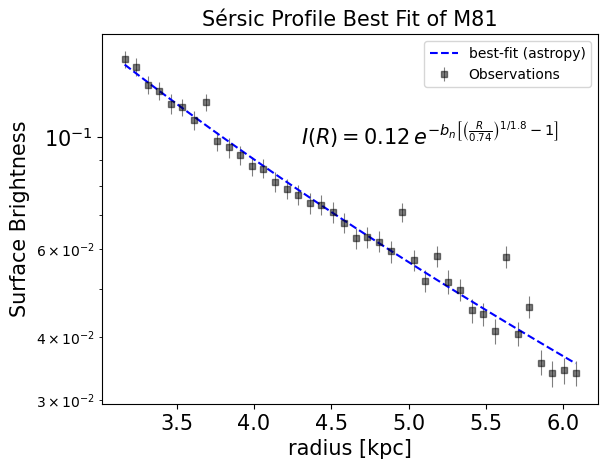

In [13]:

plt.errorbar(x, y, yerr=err, lw=0.8, markersize=5, fmt='s', color='k', alpha=0.5, label='Observations')
plt.plot(xx, best_Sersicdisk, 'b--', label='best-fit (astropy)')
plt.xlabel(r'radius [kpc]', fontsize=15)
plt.ylabel(r'Surface Brightness', fontsize=15)
plt.xticks(size=15); plt.yticks(size=15)
plt.text(0.4, 0.7, fr"$I(R) = {0.12102205144873393:.2f} \, e^{{-b_n \left[\left(\frac{{R}}{{{0.7422459769294311:.2f}}}\right)^{{1/{1.7615006775728996:.1f}}} - 1\right]}}$", fontsize=15, transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))
plt.semilogy()
plt.title('Sérsic Profile Best Fit of M81', fontsize=15)
plt.legend()
plt.show()

C:\Users\casey\AppData\Local\Temp\ipykernel_16208\3123043332.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b--" (-> color='b'). The keyword argument will take precedence.
  plt.plot(radius81bulge, best_Sersicbulge(radius81bulge), 'b--', label='best-fit bulge', color='dodgerblue')
C:\Users\casey\AppData\Local\Temp\ipykernel_16208\3123043332.py:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b--" (-> color='b'). The keyword argument will take precedence.
  plt.plot(xx, best_Sersicdisk, 'b--', label='best-fit disk', color='maroon')


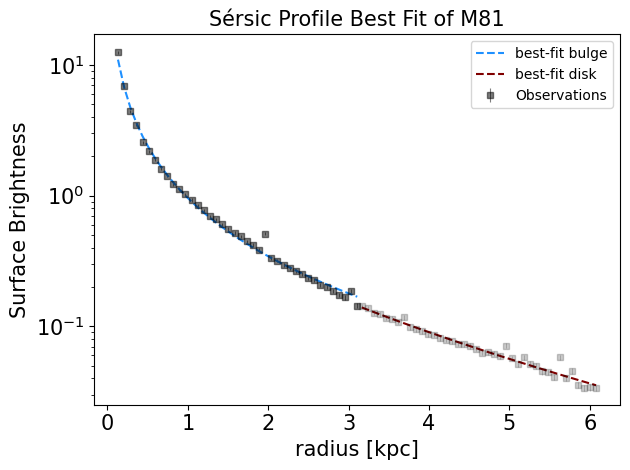

In [24]:
plt.errorbar(radius81bulge, SB81bulge, yerr=SB_err81bulge, lw=0.8, markersize=5, fmt='s', color='k', alpha=0.5, label='Observations')

plt.plot(radius81bulge, best_Sersicbulge(radius81bulge), 'b--', label='best-fit bulge', color='dodgerblue')

plt.legend()

plt.xlabel('radius [kpc]')
plt.ylabel('SB')
plt.xticks(size=10)
plt.yticks(size=10)
plt.semilogy()


plt.errorbar(x, y, yerr=err, lw=0.8, markersize=5, fmt='s', color='k', alpha=0.2)
plt.plot(xx, best_Sersicdisk, 'b--', label='best-fit disk', color='maroon')
plt.xlabel(r'radius [kpc]', fontsize=15)
plt.ylabel(r'Surface Brightness', fontsize=15)
plt.xticks(size=15); plt.yticks(size=15)
plt.semilogy()
plt.title('Sérsic Profile Best Fit of M81', fontsize=15)
plt.legend()
plt.tight_layout()
plt.show()

radius81 = np.append(radius81bulge, x)
SB81 = np.append(SB81bulge, y)
SB_err81 = np.append(SB_err81bulge, err)


[]

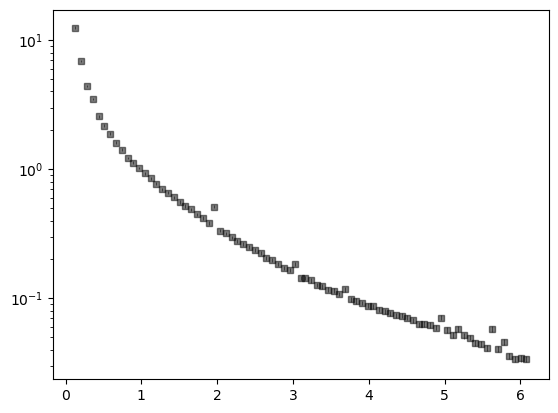

In [ ]:
plt.errorbar(radius81, SB81, yerr=SB_err81, lw=0.8, markersize=5, fmt='s', color='k', alpha=0.5, label='Observations')


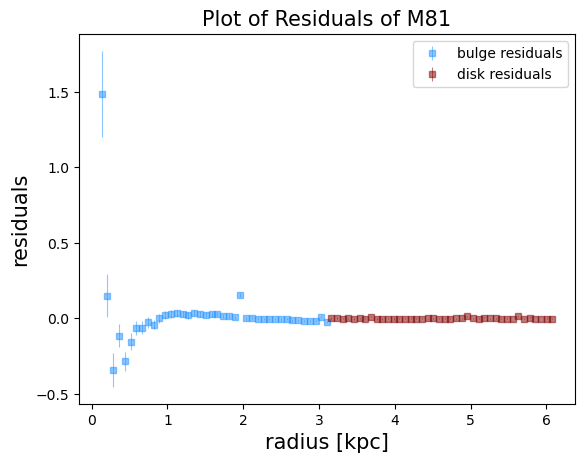

In [19]:
residuals1 = SB81bulge - best_Sersicbulge(radius81bulge) 
residuals2 = SB81disk - best_Sersicdisk

plt.errorbar(radius81bulge, residuals1, yerr=SB_err81bulge, lw=0.8, markersize=5, fmt='s', color='dodgerblue', alpha=0.5, label='bulge residuals')
plt.errorbar(radius81disk, residuals2, yerr=SB_err81disk, lw=0.8, markersize=5, fmt='s', color='maroon', alpha=0.5, label='disk residuals')

plt.xlabel('radius [kpc]', fontsize=15)
plt.ylabel('residuals', fontsize=15)
plt.xticks(size=10)
plt.yticks(size=10)
plt.title('Plot of Residuals of M81', fontsize=15)
plt.legend()
plt.show()